<a href="https://colab.research.google.com/github/CamiloE/Proyectos-Personales/blob/master/Costos_medicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerias importantes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv',sep=',')#importar dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

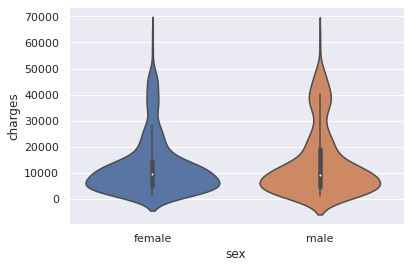

In [ ]:
sns.violinplot(data=df,x='sex',y='charges')#Conociendo la relacion entre el sexo y la variable objetivo

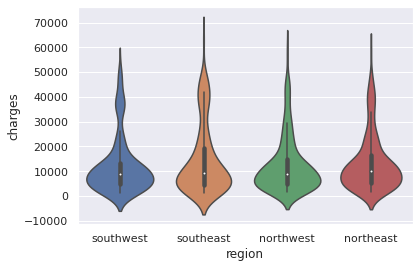

In [ ]:
sns.violinplot(data=df,x='region',y='charges')#Conociendo la relacion entre la region y la variable objetivo

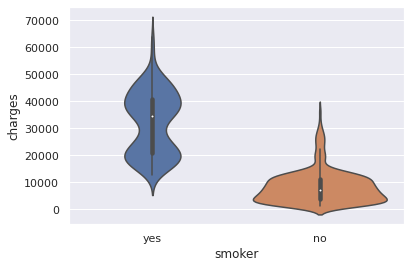

In [ ]:
sns.violinplot(data=df,x='smoker',y='charges')#Conociendo la relacion entre fumadores y la variable objetivo

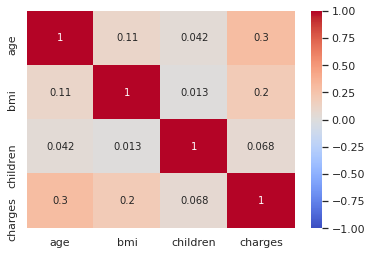

In [ ]:
corr=df.corr()
sns.heatmap(data=corr,annot=True,cmap='coolwarm',vmin=-1,vmax=1)#Mapa de correlacion para conocer esta en las variables numericas

Como las caracteristcas numericas no estan altamente correlacionadas se pueden escoger todas

<Figure size 720x504 with 0 Axes>

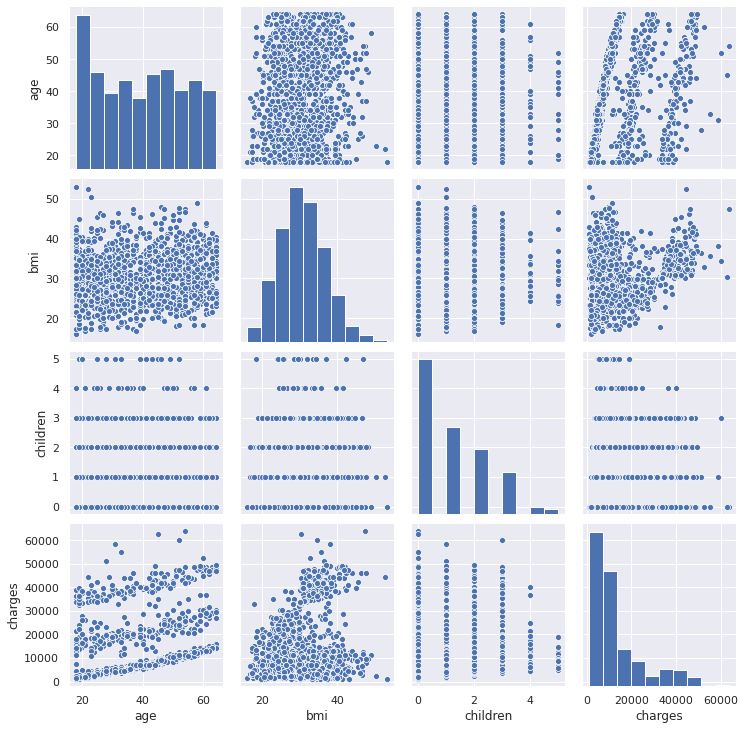

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.pairplot(df)

In [ ]:
smoker={'no':0,'yes':1}#transformacion de la variable categorica
df['smoker']=df['smoker'].map(smoker)
df['charges']=np.log(df['charges'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,9.734176
1,18,male,33.770,1,0,southeast,7.453302
2,28,male,33.000,3,0,southeast,8.400538
3,33,male,22.705,0,0,northwest,9.998092
4,32,male,28.880,0,0,northwest,8.260197


In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<Figure size 720x504 with 0 Axes>

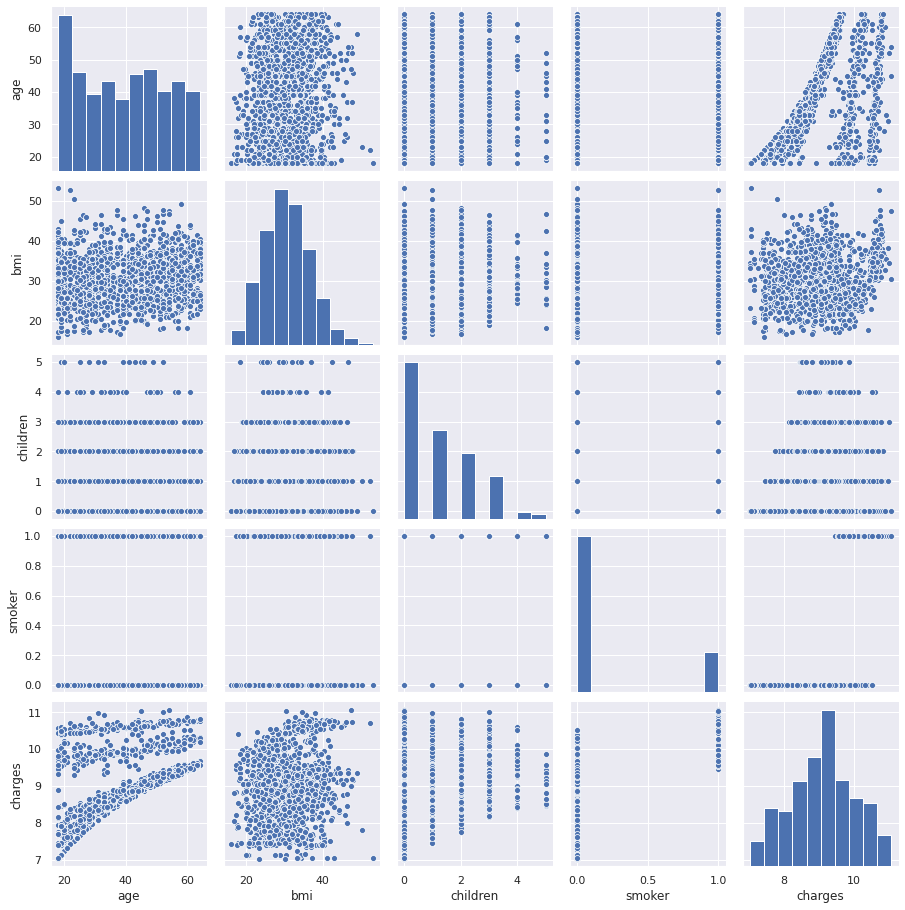

In [ ]:
plt.figure(figsize=(10,7))
sns.pairplot(df)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
X=df[['age','bmi','children','smoker']].iloc[0:300]#Seleccionar las caracteristcas importantes para el train y test con unas 300 muestras
y=df[['charges']].iloc[0:300]#Variable objetivo
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.2)#Separacion de los datos de train y test
modelo=Pipeline([('ss',StandardScaler()),
                 ('lr',LinearRegression())])#concatena los pasos de normalizacion y entrenamiento

In [ ]:
modelo.fit(X_train,y_train)#Entrenar el modelo

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
print(f'El puntaje del modelo obtenido es {modelo.score(X_test,y_test):.2f}')

El puntaje del modelo obtenido es 0.87


In [ ]:
print(f"El intercepto es {modelo['lr'].intercept_}")
print(f"Los coeficientes del modelo son {modelo['lr'].coef_}")

El intercepto es [9.05905372]
Los coeficientes del modelo son [[0.52995826 0.06447192 0.11840509 0.67317067]]


In [ ]:
from sklearn import metrics
y_pred=modelo.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)

0.10922588797312507

Polinomial Features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
def polmodel(grado=2):
  model=Pipeline([('pol',PolynomialFeatures(degree=grado)),('ss',StandardScaler()),('lr',LinearRegression())]).fit(X_train,y_train)
  return model 

In [ ]:
polmodel().score(X_test,y_test)

0.962024608070485

In [ ]:
polmodel(4).score(X_test,y_test)

0.8999150745191532

In [ ]:
polmodel(3).score(X_test,y_test)

0.9290839047684106

In [ ]:
from sklearn.model_selection import validation_curve
grados= np.arange(2,11)
train_scores, test_scores =validation_curve(polmodel(),X,y,param_name='pol__degree',param_range=grados,cv=5)

SGD

In [ ]:
from sklearn.linear_model import SGDRegressor 
model2=Pipeline([('ss',StandardScaler()),('gd',SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01,alpha=0.5))]).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model2.score(X_test,y_test)

0.8168577174836605